In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.io import imread

In [2]:
with sqlite3.connect('data_20200823.db') as conn:
    c = conn.cursor()
    c.execute("select username, winner, loser, time from woong_bodyprofile")
    l = c.fetchall()

In [3]:
df = pd.DataFrame(l, columns=['username', 'winner', 'loser', 'time'])

In [4]:
len(df)

2154

In [5]:
l_photo = list(set(list(df['winner']) + list(df['loser'])))

In [6]:
len(l_photo)

159

In [7]:
photo_dir = 'static/projects/woong-bodyprofile/photos/'
l_filename = [s for s in os.listdir(photo_dir) if s.endswith('.jpg')]

In [8]:
len(l_filename)

381

In [9]:
df = df.drop(index=[0,1,2,3])

In [10]:
df

,username,winner,loser,time
4,미요는모서리를좋아한다,J83A9814-2.jpg,J83A0339.jpg,2020-08-02 14:03:02.122009
5,미요는모서리를좋아한다,J83A9973-2.jpg,J83A9799-2.jpg,2020-08-02 14:03:10.709085
6,미요는모서리를좋아한다,J83A9913-2.jpg,J83A9930-2.jpg,2020-08-02 14:03:20.609223
7,미요는모서리를좋아한다,J83A0285.jpg,J83A9803-2.jpg,2020-08-02 14:03:27.349273
8,미요는모서리를좋아한다,J83A0222.jpg,J83A0354.jpg,2020-08-02 14:03:33.144179
...,...,...,...,...
2149,yjheo,J83A9899-2.jpg,J83A0292.jpg,2020-08-10 17:52:45.998393
2150,yjheo,J83A0245.jpg,J83A0011.jpg,2020-08-10 17:52:50.205577
2151,yjheo,J83A9814-2.jpg,J83A0246.jpg,2020-08-10 17:52:53.717209
2152,yjheo,J83A0350.jpg,J83A0379.jpg,2020-08-10 17:52:56.279336


In [11]:
len(df['username'].unique())

36

In [12]:
df.groupby('username')['winner'].count().sort_values()

username
yuui24           1
취미실화             5
조용민2             5
김윤구              8
Seacrest        11
Sukjun Kim      11
이병호             11
정은짱             14
SY              15
YHGF            16
lyn             17
박마음             17
yjheo           17
민주              18
차선희             18
최영민             19
LYH             27
조용민             28
박하연             28
진영              29
화라니             33
swyoon          33
나다이새끼야          38
유라              44
김유진             44
임민수             45
강기정             55
jwc             55
                65
승재              68
cylee          100
미요는모서리를좋아한다    108
김재윤            166
Sang2          181
윤세훈            399
박진우            401
Name: winner, dtype: int64

In [13]:
wins = df.groupby('winner').count()['time']

In [14]:
loses = df.groupby('loser').count()['time']

In [15]:
loses

loser
J83A0008.jpg      8
J83A0009.jpg      9
J83A0010.jpg      6
J83A0011.jpg      7
J83A0012.jpg      9
                 ..
J83A9987-2.jpg    6
J83A9988-2.jpg    6
J83A9989-2.jpg    6
J83A9990-2.jpg    2
J83A9991-2.jpg    7
Name: time, Length: 159, dtype: int64

In [16]:
result = pd.DataFrame([wins, loses]).T
result.columns = ['win', 'lose']

In [17]:
result

,win,lose
J83A0008.jpg,16,8
J83A0009.jpg,15,9
J83A0010.jpg,21,6
J83A0011.jpg,16,7
J83A0012.jpg,23,9
...,...,...
J83A9987-2.jpg,16,6
J83A9988-2.jpg,17,6
J83A9989-2.jpg,17,6
J83A9990-2.jpg,15,2


In [18]:
result['rate'] = result['win'] / (result['win'] + result['lose'])

In [19]:
rank_rate = result.sort_values('rate', ascending=False)
rank_rate

,win,lose,rate
J83A9990-2.jpg,15,2,0.882353
J83A9964-2.jpg,22,5,0.814815
J83A9804-2.jpg,21,5,0.807692
J83A9985-2.jpg,16,4,0.800000
J83A0027.jpg,19,5,0.791667
...,...,...,...
J83A0264.jpg,3,17,0.150000
J83A9913-2.jpg,4,26,0.133333
J83A9912-2.jpg,3,23,0.115385
J83A9957-2.jpg,3,25,0.107143


In [20]:
wins

winner
J83A0008.jpg      16
J83A0009.jpg      15
J83A0010.jpg      21
J83A0011.jpg      16
J83A0012.jpg      23
                  ..
J83A9987-2.jpg    16
J83A9988-2.jpg    17
J83A9989-2.jpg    17
J83A9990-2.jpg    15
J83A9991-2.jpg    15
Name: time, Length: 159, dtype: int64

In [21]:
ranking = df.groupby('winner').count()['time'].sort_values(ascending=False).head(50)
ranking

winner
J83A0379.jpg      26
J83A9973-2.jpg    26
J83A0014.jpg      24
J83A0012.jpg      23
J83A0241.jpg      23
J83A0306.jpg      22
J83A9852-2.jpg    22
J83A9964-2.jpg    22
J83A9866-2.jpg    21
J83A0020.jpg      21
J83A0010.jpg      21
J83A9867-2.jpg    21
J83A9974-2.jpg    21
J83A0368.jpg      21
J83A9804-2.jpg    21
J83A9966-2.jpg    20
J83A9962-2.jpg    20
J83A9986-2.jpg    20
J83A0017.jpg      19
J83A0027.jpg      19
J83A0309.jpg      19
J83A9807-2.jpg    19
J83A0016.jpg      19
J83A0350.jpg      19
J83A0348.jpg      18
J83A0359.jpg      18
J83A9864-2.jpg    18
J83A0381.jpg      18
J83A0291.jpg      18
J83A0237.jpg      18
J83A9965-2.jpg    18
J83A0220.jpg      18
J83A0376.jpg      17
J83A0023.jpg      17
J83A9972-2.jpg    17
J83A0331.jpg      17
J83A0367.jpg      17
J83A0373.jpg      17
J83A0013.jpg      17
J83A0258.jpg      17
J83A9988-2.jpg    17
J83A9989-2.jpg    17
J83A9985-2.jpg    16
J83A9987-2.jpg    16
J83A9978-2.jpg    16
J83A9814-2.jpg    16
J83A0223.jpg      16
J83A00

In [22]:
rank_rate

,win,lose,rate
J83A9990-2.jpg,15,2,0.882353
J83A9964-2.jpg,22,5,0.814815
J83A9804-2.jpg,21,5,0.807692
J83A9985-2.jpg,16,4,0.800000
J83A0027.jpg,19,5,0.791667
...,...,...,...
J83A0264.jpg,3,17,0.150000
J83A9913-2.jpg,4,26,0.133333
J83A9912-2.jpg,3,23,0.115385
J83A9957-2.jpg,3,25,0.107143


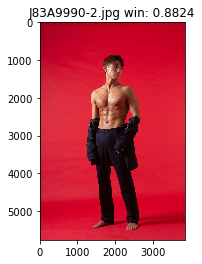

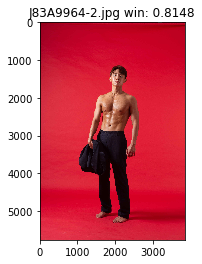

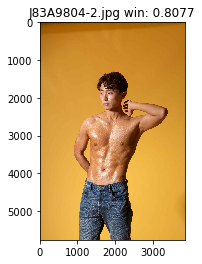

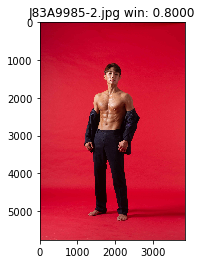

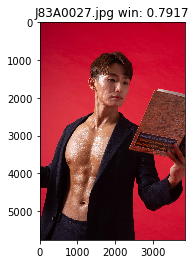

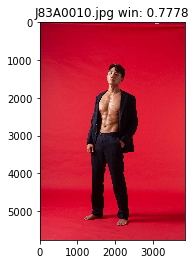

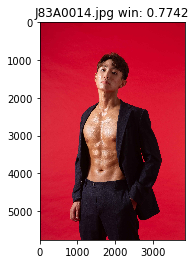

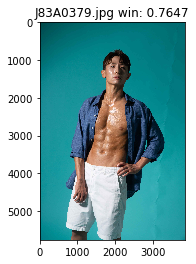

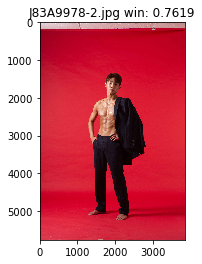

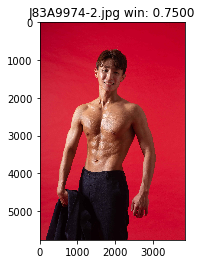

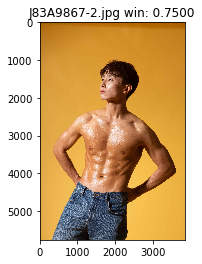

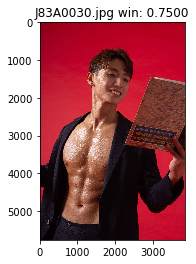

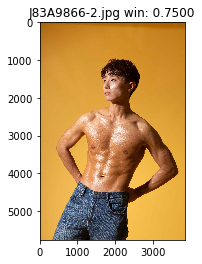

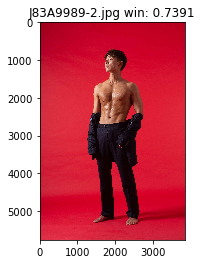

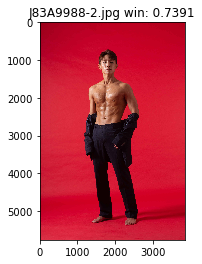

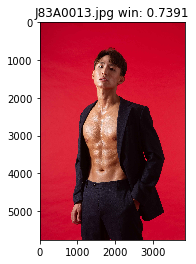

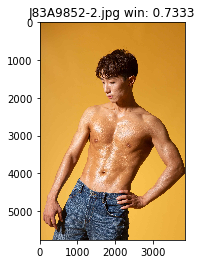

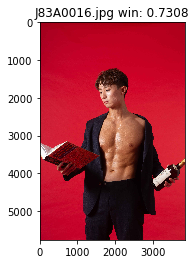

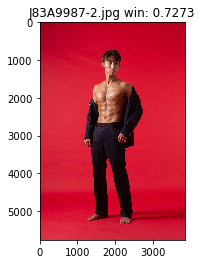

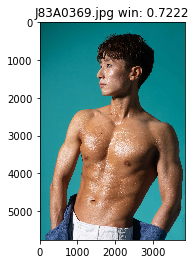

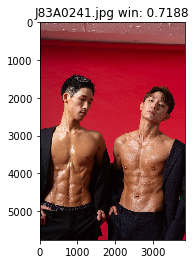

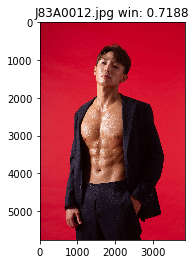

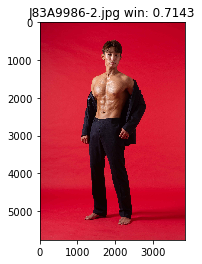

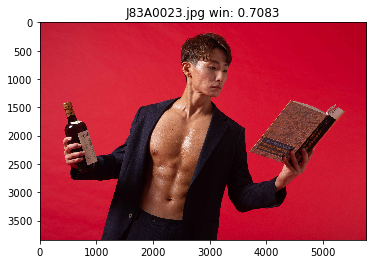

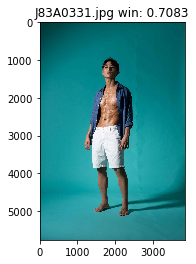

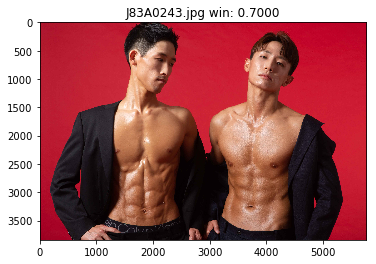

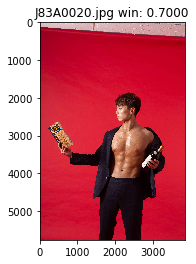

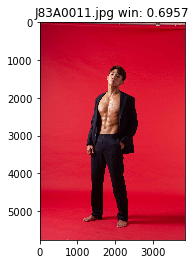

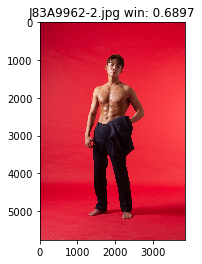

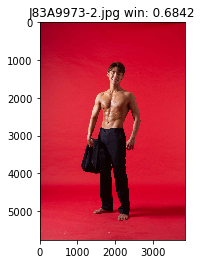

In [24]:
for name, row in rank_rate[:30].iterrows():
    rate = row['rate']
    s = os.path.join(photo_dir, name)
    img = imread(s)
    plt.figure()
    plt.imshow(img)
    plt.title(name + f' win: {rate:.4f}')
    